In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker
from mysql import connector as con
import os

In [2]:
# creating an instance of Faker class
fk = Faker()

In [3]:
# Declaring the number of rows my dataset with have
rows = 50000

In [4]:
# Making sure the dataset is reproducible
Faker.seed(452)

# Declaring an empty list where infomation of each row will be appended
books = []

# Iterrating over each row to generate the entries for each column
for row in range(rows):
    
    # Creating a dictionary that will hold the enteries for each row that is iterrated over
    book={
        # column : values
        "bookid":row,
        "author":fk.name(),
        "title":fk.sentence(),
        "published":fk.year(),
        "barcode":fk.ean(length=13)
    }
    # Appending the rows to the empty book list created
    books.append(book)
    
# Declaring an empty list where infomation of each row will be appended    
patrons = []

# Iterrating over each row to generate the entries for each column
for row in range(rows):
    
    # Creating a dictionary that will hold the enteries for each row that is iterrated over
    patron = {
        # column : values
        "patronid":row,
        "firstname":fk.first_name(),
        "lastname":fk.last_name(),
        "email":fk.email()
    }
    patrons.append(patron)


# Declaring an empty list where infomation of each row will be appended
loans = []

# Iterrating over each row to generate the entries for each column
for row in range(rows):
    
    # Creating a dictionary that will hold the enteries for each row that is iterrated over
    loan = {
        "loanid":row,
        "bookid":row,
        "patronid":row,
        "loandate":fk.date_this_century(),
        "duedate":fk.date_this_century(),
        "returneddate":fk.date_this_century()
    }
    loans.append(loan)

In [5]:
# Transforming the list of dataset generated into pandas dataframe
# Resetting the index of each dataframe
book_df = pd.DataFrame(books)
book_df = book_df.set_index("bookid")
patron_df = pd.DataFrame(patrons)
patron_df = patron_df.set_index("patronid")
loan_df = pd.DataFrame(loans)
loan_df = loan_df.set_index("loanid")

In [6]:
book_df.head()

,author,title,published,barcode
bookid,,,,
0,Matthew Newton,Become because woman your mind successful.,2005,9709724946267
1,Ricky Baker,Wear send week front probably piece soon.,2012,1190253231463
2,Jason Sutton,Soldier anyone in require I catch face.,1984,9006055929328
3,Jamie Koch,Need understand draw behavior woman later look...,2022,6788634237453
4,Douglas Hickman,All else tonight address under type task money.,1974,7440361577439


In [7]:
patron_df.head()

,firstname,lastname,email
patronid,,,
0,Leah,Moore,lindsey21@example.org
1,Stephanie,Romero,melissa70@example.com
2,Isaac,Rodriguez,williamsgabriella@example.com
3,Mercedes,Boyle,sloanmichelle@example.org
4,Bryan,Evans,mortonjessica@example.org


In [8]:
loan_df.head()

,bookid,patronid,loandate,duedate,returneddate
loanid,,,,,
0,0,0,2005-03-09,2022-03-19,2007-11-19
1,1,1,2011-08-03,2002-01-22,2002-06-01
2,2,2,2011-01-08,2009-10-31,2005-07-15
3,3,3,2000-01-14,2013-11-19,2011-12-02
4,4,4,2014-05-12,2016-09-02,2000-10-05


In [9]:
# Regenerating the bookid and patronid column randomly in loan_df - idea is to reshuffle it
loan_df["bookid"] = np.random.randint(1, 50001, size=50000)
loan_df["patronid"] = np.random.randint(1, 50001, size=50000)

In [10]:
loan_df.head()

,bookid,patronid,loandate,duedate,returneddate
loanid,,,,,
0,12230,46908,2005-03-09,2022-03-19,2007-11-19
1,16965,33458,2011-08-03,2002-01-22,2002-06-01
2,45521,1241,2011-01-08,2009-10-31,2005-07-15
3,1800,30177,2000-01-14,2013-11-19,2011-12-02
4,41583,16651,2014-05-12,2016-09-02,2000-10-05


In [11]:
# converting the date columns to datatime64[ns] datatype
loan_df[["loandate", "duedate", "returneddate"]] =loan_df[["loandate", "duedate", "returneddate"]].apply(lambda x: pd.to_datetime(x))

In [12]:
# recreating the duedate to make duration of return 14 days and correct any date inconsistency
loan_df["duedate"]= loan_df["loandate"] + pd.Timedelta(days=14)

In [13]:
# recreating the return to make duration of return random days as people may return the books at different duration time and correct any date inconsistency
loan_df["returneddate"] = loan_df["loandate"].apply(lambda x: x + pd.Timedelta(days=np.random.randint(2, 20)))

In [14]:
# Generating row number of boolean value of with 30% is True bool and 70% is False bool
mask = np.random.choice([True, False], size=loan_df.shape[0], p=[0.3, 0.7])
# conditionaly filtering to assign randomly selected rows nan values since not everyone would have return their books
loan_df.loc[mask, "returneddate"] = np.null

In [15]:
book_df.head()

,author,title,published,barcode
bookid,,,,
0,Matthew Newton,Become because woman your mind successful.,2005,9709724946267
1,Ricky Baker,Wear send week front probably piece soon.,2012,1190253231463
2,Jason Sutton,Soldier anyone in require I catch face.,1984,9006055929328
3,Jamie Koch,Need understand draw behavior woman later look...,2022,6788634237453
4,Douglas Hickman,All else tonight address under type task money.,1974,7440361577439


In [16]:
patron_df.head()

,firstname,lastname,email
patronid,,,
0,Leah,Moore,lindsey21@example.org
1,Stephanie,Romero,melissa70@example.com
2,Isaac,Rodriguez,williamsgabriella@example.com
3,Mercedes,Boyle,sloanmichelle@example.org
4,Bryan,Evans,mortonjessica@example.org


In [17]:
loan_df.head()

,bookid,patronid,loandate,duedate,returneddate
loanid,,,,,
0,12230,46908,2005-03-09,2005-03-23,NaT
1,16965,33458,2011-08-03,2011-08-17,NaT
2,45521,1241,2011-01-08,2011-01-22,NaT
3,1800,30177,2000-01-14,2000-01-28,NaT
4,41583,16651,2014-05-12,2014-05-26,NaT


Now  we do have the dataset for the library we can start creating the database

Before you start going through the whole project you need to open your anaconda prompt or terminal
activate your environment

**VS code terminal --- remember your environment file path will be different from mine**

(.env) C:\Users\ahiab\python_works\vsjupyter>set DB_USERNAME=usernamer

(.env) C:\Users\ahiab\python_works\vsjupyter>set DB_USERNAME=password


**Anaconda prompt --- your environment file path will be different from mine**

(C:\Users\ahiab\python_works\env) C:\Users\ahiab\python_works>DB_USERNAME=usernamer

(C:\Users\ahiab\python_works\env) C:\Users\ahiab\python_works>DB_USERNAME=password

In [18]:
# Since you might share your project others you don't want to have sensitive information in the code
db_user=os.environ.get("DB_USERNAME")
db_password=os.environ.get("DB_PASSWORD")

The best way to set up connection by using your environment variables where you sensitive infomation is hidden

In [19]:
# setting up a connection to the database connection server
cnx = con.connect(
    auth_plugin='mysql_native_password',
    host="localhost",
    user=db_user,
    password =db_password
)

if you setup your connection this way you will expose your sensitive infomation

In [47]:
# setting up a connection to the database connection server

# cnx = con.connect(
#     auth_plugin='mysql_native_password',
#     host="localhost",
#     user="username",
#     password ="password"
# )

In [21]:
# Creating a cursor object that will write queries to the database
cur = cnx.cursor()

In [22]:
# Dropping any database if they exist with same name as the one we are about creating
cur.execute("DROP DATABASE library")

In [23]:
# Creating a database with the name library
cur.execute("CREATE DATABASE library")

In [24]:
# Activate the use of the created library
cur.execute("USE library")

In [25]:
# Declaring a variable query that holds the syntax for creating the tables in that database
query = """
CREATE TABLE books (
    bookid INT AUTO_INCREMENT PRIMARY KEY,
    author VARCHAR(255) NOT NULL,
    title VARCHAR(255) NOT NULL,
    published INT NOT NULL,
    barcode VARCHAR(255) NOT NULL
);

CREATE TABLE patrons (
    patronid INT AUTO_INCREMENT PRIMARY KEY,
    firstname VARCHAR(255) NOT NULL,
    lastname VARCHAR(255) NOT NULL,
    email VARCHAR(255) NOT NULL
);


CREATE TABLE loans (
    loanid INT AUTO_INCREMENT PRIMARY KEY,
    bookid INT NOT NULL,
    patronid INT NOT NULL,
    loandate DATE NOT NULL,
    duedate DATE NOT NULL,
    returneddate DATE,
    FOREIGN KEY (bookid) REFERENCES books(bookid),
    FOREIGN KEY (patronid) REFERENCES patrons(patronid)
);

"""

In [26]:
# Creating the tables by passing the query to the cursor
cur.execute(query)

In [27]:
# Creating a function that takes dataframe and tablename to generate the insert statement since we cannot type 50000 insert statement
def insert_statement_generator(df, tablename):
    for index, row in df.iterrows():
        values=[]
        for value in row: 
            if pd.isna(value):
                value = "NULL"
            else:
                value =f'"{value}"'  
            values.append(value)
        col_name = ", ".join(df.columns)
        chng_val = ", ".join(f"{val}" for val in values)
        insert_statement = f"INSERT INTO {tablename} ({col_name}) VALUES ({chng_val})"
        yield insert_statement  

In [28]:
# Generating books table insert statement from book_df and covert the  object created by the yield in the function to list
bk = list(insert_statement_generator(book_df, "books"))

In [36]:
# Looping through the list and inserting into the books table
for statement in bk:
    cur.execute(statement)

In [37]:
# Generating patrons table insert statement from patron_df and covert the object created by the yield in the function to list
pn = list(insert_statement_generator(patron_df, "patrons"))

In [38]:
# Looping through the list and inserting into the patrons table
for statement in pn:
    cur.execute(statement)

In [39]:
# Generating patrons table insert statement from patron_df and covert the object created by the yield in the function to list
ln = list(insert_statement_generator(loan_df, "loans"))

In [40]:
# Looping through the list and inserting into the patrons table
for statement in ln:
    cur.execute(statement)

In [41]:
# Saving all your have done it to take effect in the database
cnx.commit()

Now we have set up our database we can query it to answer analytical questions

In [42]:
# What are the most popular books based on the number of loans
query1 = """
SELECT title, COUNT(*) as loan_count
FROM books
JOIN loans 
ON books.bookid = loans.bookid
GROUP BY title
ORDER BY loan_count DESC
LIMIT 5;
"""

In [43]:
qry_df = pd.read_sql(query1, cnx)

C:\Users\ahiab\AppData\Local\Temp\ipykernel_14004\434231140.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  qry_df = pd.read_sql(query1, cnx)


In [44]:
qry_df

,title,loan_count
0,Choose his control figure per nature air.,8
1,Inside against full dream us national.,7
2,Page every late.,7
3,Affect sure oil thus.,7
4,Bad he quickly wind management.,7


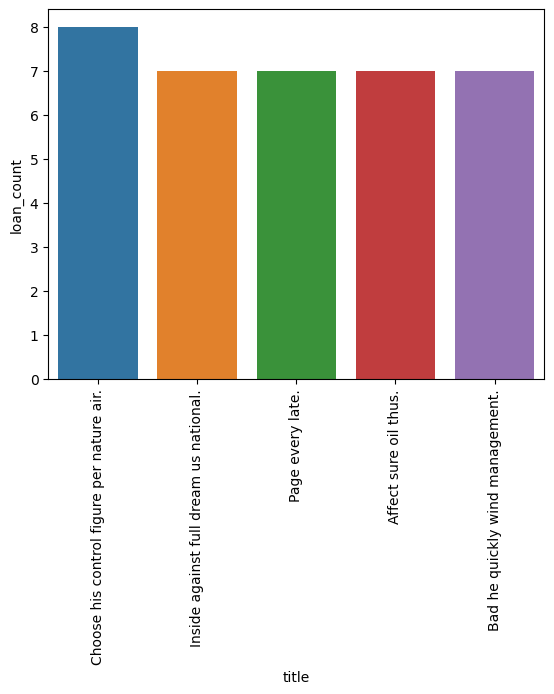

In [45]:
sns.barplot(data=qry_df, x="title", y="loan_count")
plt.xticks(rotation=90);

In [46]:
# you can query you database use the visual to explore the resuts.



* What are the most popular books based on the number of loans? --- firstone already done at the top
* What are the books that have been published in a specific year?
* What are the books with a specific author?
* What is the average loan duration for a book?
* What are the most popular books based on the number of loans?
* How many books have been returned late?
* What is the average number of books loaned by each patron?
* Who are the patrons who have taken the most number of loans?
* What is the distribution of patrons based on their email domain?